# Question 1
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.



In [36]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

### Read data

In [2]:

df1=pd.read_csv("Cutlets.csv")

In [4]:
df1.head(5)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


### Data Type
+ The data is numerical 
+ 2 samples unitA and Unit B
+ Paired samples-Ztest-two tailed test

### Problem statement

Research Question
Is there  any significant difference in the diameter of the cutlet between two units?

Population:All cutlets in F& B

Parameter of Interest:  𝜇1−𝜇2 , diameter of the cutlet 

Null Hypothesis:  𝜇1=𝜇2 
Alternative Hypthosis:  𝜇1≠𝜇2 
    

### Collect statistics from the data file

In [33]:
#Data:
samplesize=df1.shape
print("samplesize is",samplesize[0])
Unita_mean=np.round(np.mean(df1['Unit A']),4)
Unitb_mean=np.round(np.mean(df1['Unit B']),4)
Unita_std=np.round(np.std(df1['Unit A']),4) 
Unitb_std=np.round(np.std(df1['Unit B']),4)
print("Unita_mean is", Unita_mean)
print("Unitb_mean is",Unitb_mean )
print("Unita_std is",Unita_std )
print("Unitb_std is", Unitb_std)


samplesize is 35
Unita_mean is 7.0191
Unitb_mean is 6.9643
Unita_std is 0.2843
Unitb_std is 0.3385


###  Run the test

In [39]:

sm.stats.ztest(df1['Unit A'].dropna(), df1['Unit B'].dropna(), alternative='two-sided')

(0.7228688704678061, 0.46976045023906077)

### Conclusion of the hypothesis test

Since the p-value (0.4697)>(α=0.05), we cannot reject the Null hypothesis which says that there is no significant difference in the diameter of the cutlet between two units. Note, we used alternative="two-sided" in the z-test because here we are checking for inequality.

# Question 2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 


### Read data from csv file and store in dataframe

In [42]:
df2=pd.read_csv("LabTaT.csv")
df2.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


### Data Type
+ The data is numerical 
+ Greater than 2 samples Laboratory1,Laboratory2,Laboratory3 and Laboratory4
+ ANOVA test

### Problem statement

Research question:
determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list

+ Null Hypothesis: 𝜇_1=𝜇_2=𝜇_3
+ Alternative hypothesis: Atleast one of the Mu is different

### Run the test

In [44]:
stats.f_oneway(df2.iloc[:,0], df2.iloc[:,1],df2.iloc[:,2],df2.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

Conclusion

Since the p-value (2.1156708949992414e-57) is extremely less than 0.05, we reject the null hypothesis. This means we can say that there is significant difference in the the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. (Atleast oneof the  mean is different).



# Question -3

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

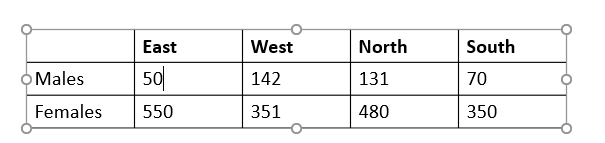

### Read the data from csv

In [46]:
df3=pd.read_csv("BuyerRatio.csv")
df3.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


### data type:


+ The data is categorical
+ Greater than 2 samples -degree of freedon=(r-1)* (c-1)=(2-1)*(4-1)=3
+ Chi-squared test(test of independence)

### Problem statement

+ Research question
+ Find if male-female buyer rations are similar across regions.



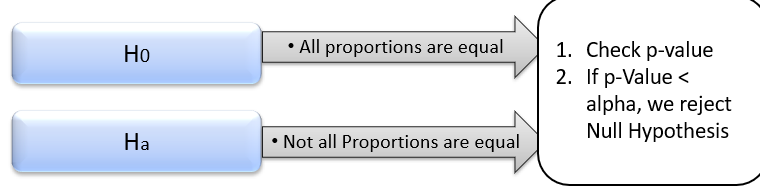

In [47]:
# chi-squared test 
from scipy.stats import chi2_contingency

In [49]:
# contingency table
table = [[50,142,131,70],
[435,1523,1356,750]]
print(table)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [51]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print("p-value",p)

dof=3
p-value 0.6603094907091882


In [106]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Not all proportion are equal,Dependence of categorical variables (male-female buyer rations are NOT similar across regions (does vary and somewhat/significantly related)(reject H0)')
else:
    print('All proportions are equal,male-female buyer rations are similar across regions and are not related (fail to reject H0)')

significance=0.050, p=0.277
All proportions are equal,male-female buyer rations are similar across regions and are not related (fail to reject H0)


# Question 4:
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


### Read Data

In [58]:
df4=pd.read_csv("costomer+OrderForm.csv")
df4.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [60]:
n=df4.shape
n[0]

300

## Data Type
+ The data is numerical
+ Greater than 2 samples ,Phillippines,	Indonesia,	Malta,	Indi
+ Chi-squared test-Test of iNdependence
+ df=(r-1)*(c-1)=(2-1)*(4-1)=3

### Problem statement

 Research question:                                                                                                             
 The manager wants to check whether the defective %  varies by centre?

+ Null hypothesis:Independence of categorical variables (customer order forms defective % does not varies by centre)
+ Alternative hypothesis: Dependence of categorical variables (customer order forms defective % varies by centre)

In [95]:
df4.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [96]:
df4.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [98]:
df4.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [99]:
df4.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [100]:
# contingency table
table = [[271,267,269,280],
[29,33,31,20]]
print(table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [101]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print("p-value",p)

dof=3
p-value 0.2771020991233135


In [103]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependence of categorical variables (customer order forms defective % varies by centre) (reject H0)')
else:
    print('Independence of categorical variables (customer order forms defective % does not varies by centre)  (fail to reject H0)')

significance=0.050, p=0.277
Independence of categorical variables (customer order forms defective % does not varies by centre)  (fail to reject H0)
